In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = 'ted.mp3'
y, sr = librosa.load(filename)

In [ ]:
intervals = librosa.effects.split(y=y, frame_length=8000, top_db=40)
intervals

array([[      0,  284672],
       [ 286208,  309760],
       [ 318464,  380928],
       [ 394240,  416768],
       [ 417280,  534528],
       [ 537088,  624640],
       [ 633344,  696320],
       [ 697344,  737280],
       [ 754176,  778752],
       [ 788480, 1100288],
       [1104384, 1225216],
       [1226752, 1262592],
       [1268224, 1418240],
       [1431040, 1714176]])

In [ ]:
end_of_sentence_pauses = []
for start, end in intervals:
    duration = (end - start) / sr
    if duration > 0.5:  
        end_of_sentence_pauses.append(end)

In [ ]:
tokens = []
start = 0
for pause in end_of_sentence_pauses:
    tokens.append(y[start:pause])
    start = pause
tokens.append(y[start:])

In [ ]:
for i, token in enumerate(tokens):
    sf.write(f'token_{i}.wav', token, sr, 'PCM_24')

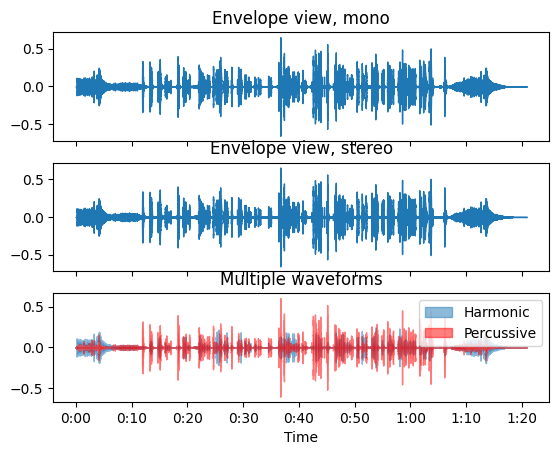

In [ ]:
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')
ax[1].label_outer()

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

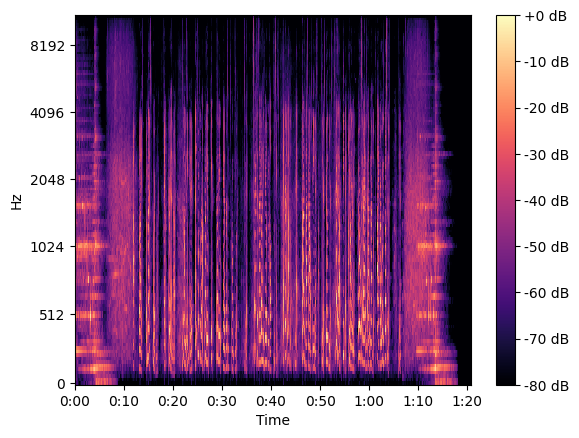

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr)

librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.show()